In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df = pd.read_csv('Predict Price of Airline Tickets.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.isna().sum().sum() #The df has 2 Nan , So we'll drop them

2

In [9]:
df = df.dropna()

In [10]:
df.duplicated().sum() # 220 duplicated rows which is a relatively high number and could affect our model, so lets drop them


220

In [11]:
df = df.drop_duplicates()
df.duplicated().sum() #Done

0

In [12]:
# Howmany airlines are we dealing with??
df['Airline'].nunique()  #12 airlines

12

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa5410cf9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa54105a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa5410cf3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa54105af50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5410bf910>],
 'means': []}

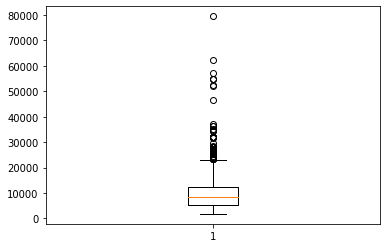

In [13]:
plt.boxplot(df['Price'])
#it appears that their is an outlier, lets check what is it

In [14]:
df[df['Price']>=70000]#So as you can see, this row can be an outlier because the prifce is so high compared to the other ones


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [15]:
i = df[df['Price']>=70000].index

In [16]:
#Lets drop it
df.drop(i) # Done :)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Text(0.5, 1.0, 'Airlines that has most rides')

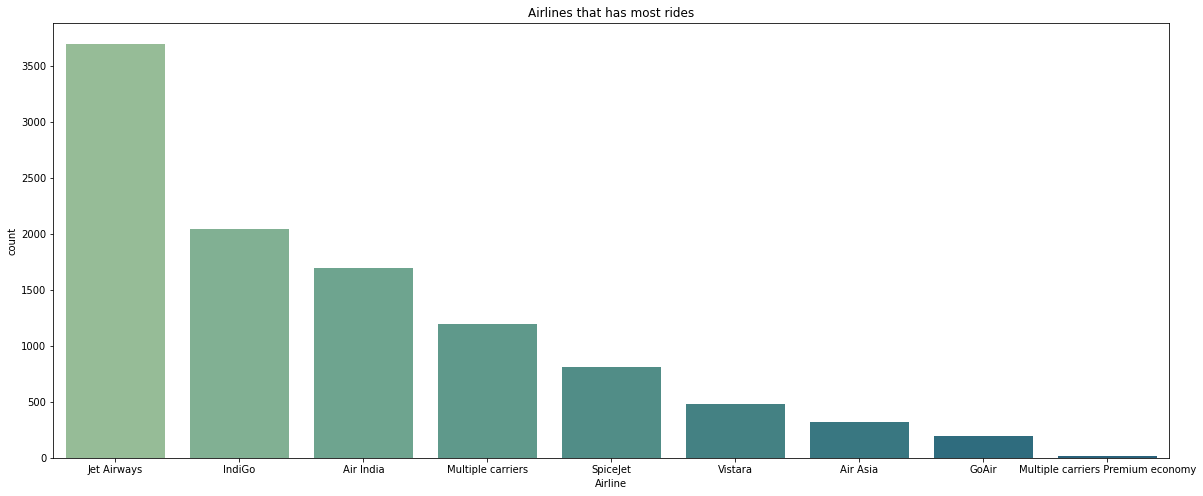

In [17]:
#Let's check which airline has most rides
plt.figure(figsize=(20,8))
a = sns.countplot(data=df, x='Airline', order = df['Airline'].value_counts().index, palette='crest')
a.set_xlim(-0.5,8.5)
a.set_title('Airlines that has most rides')

#Jet Airways has most rides, maybe they provide best offers

(-0.5, 8.5)

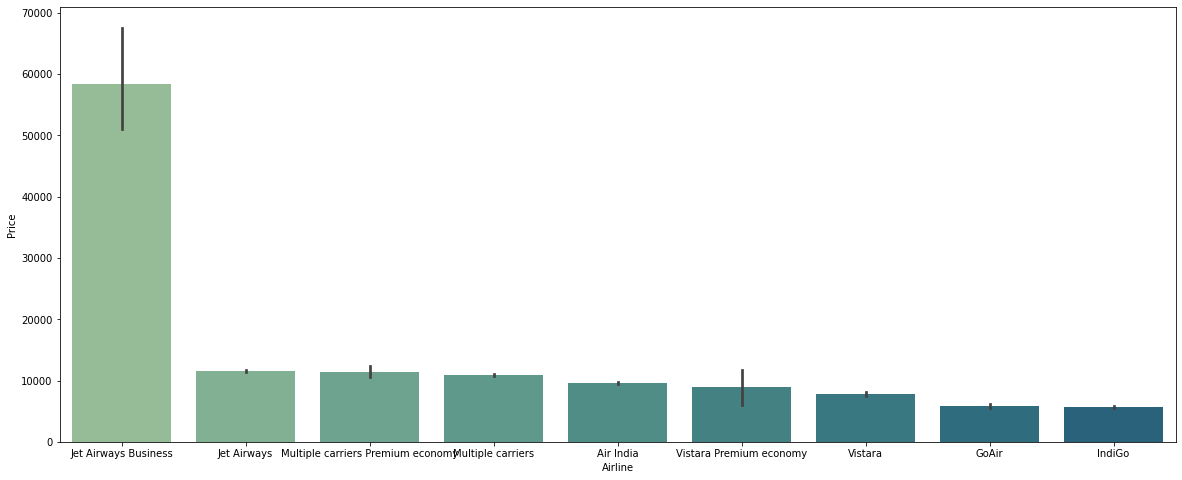

In [18]:
#Let's check which air line provide best prices

plt.figure(figsize=(20,8))
order = df.groupby(['Airline'])['Price'].mean().sort_values(ascending=False).index
b = sns.barplot(data=df, x='Airline', y='Price', order=order, palette='crest')
b.set_xlim(-0.5,8.5)


#From this plot we see that jet airway business has very high prices, The prices of the jet airways economy and the other ones are nearly the same.
#Maybe jetair ways has best service , or the dataset maybe the problem

In [19]:
df['Source'].nunique() # 5 sources , Lets check which has the most count


5

Text(0.5, 1.0, 'Source count')

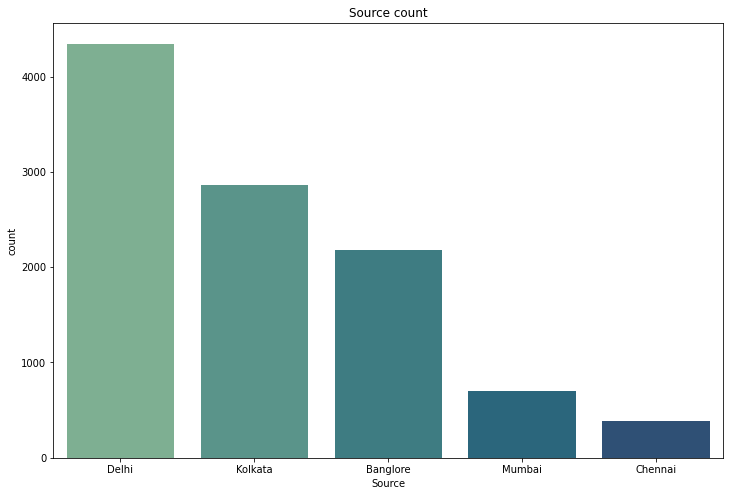

In [20]:

plt.figure(figsize=(12,8))
h = sns.countplot(data=df, x='Source', order = df['Source'].value_counts().index, palette='crest')
h.set_title('Source count')

#Delhi is the highest source

Text(0.5, 1.0, 'Source and prices barplot')

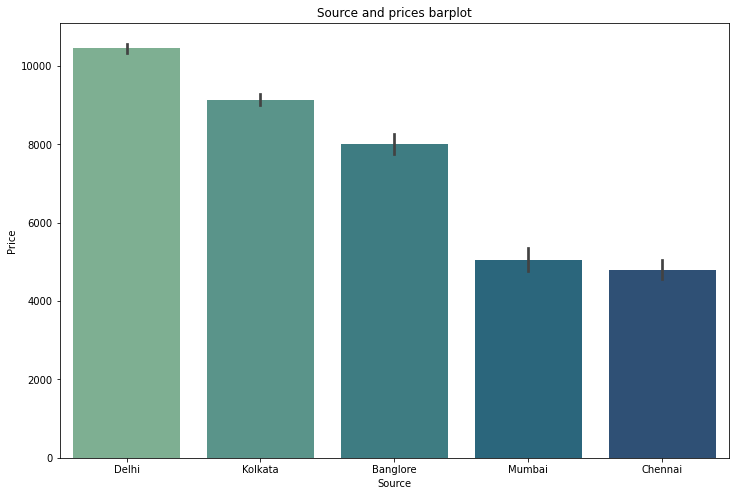

In [21]:

plt.figure(figsize=(12,8))
order = df.groupby(["Source"])["Price"].mean().sort_values(ascending=False).index
h = sns.barplot(data=df, x='Source', y='Price',  order = order, palette='crest')
h.set_title('Source and prices barplot')


#We can deduce from this plot that Flights from Delhi have highest price

In [22]:
df['Destination'].nunique() #6 Unique destinations, lets find which one has highest count


6

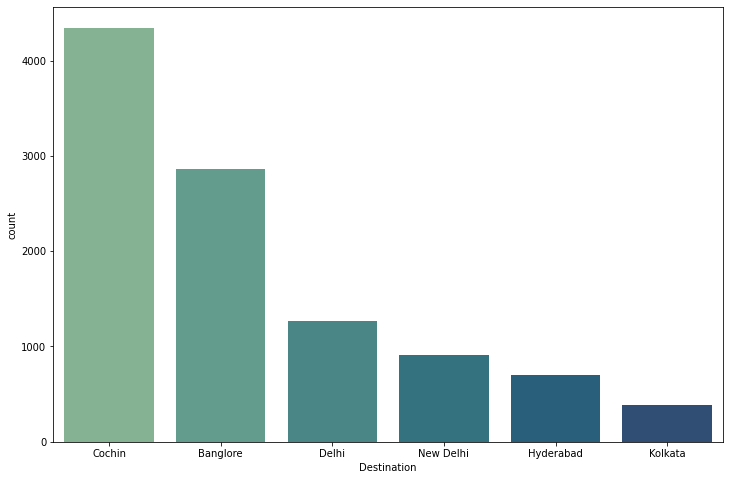

In [23]:

plt.figure(figsize=(12,8))
s = sns.countplot(data=df, x='Destination', order=df['Destination'].value_counts().index ,palette='crest')
#Most people ride to Cochin, 
#Have you noticed something? all these data are related to india, so this is an indian dataset to compare price tickets.

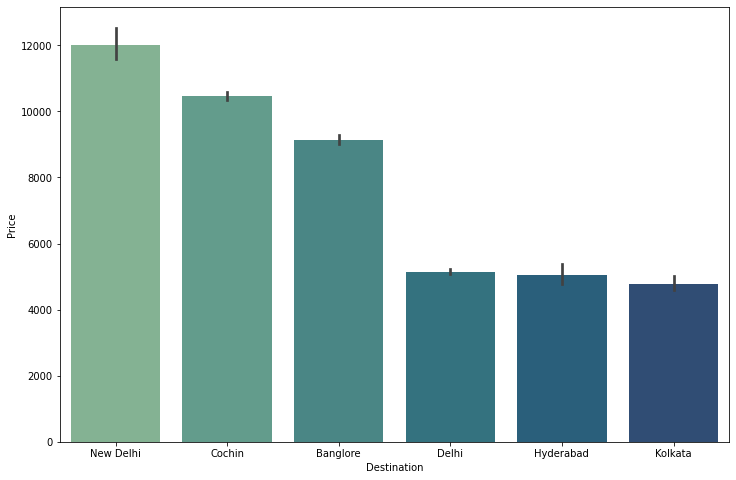

In [24]:
#Lets see the destination that has the highest price
plt.figure(figsize=(12,8))
order = df.groupby(['Destination'])['Price'].mean().sort_values(ascending = False).index
m = sns.barplot(data=df, x='Destination', y = 'Price', order = order, palette = 'crest')

#New delhi is the destination that has highest prices

Text(0.5, 1.0, 'Highest price destinations')

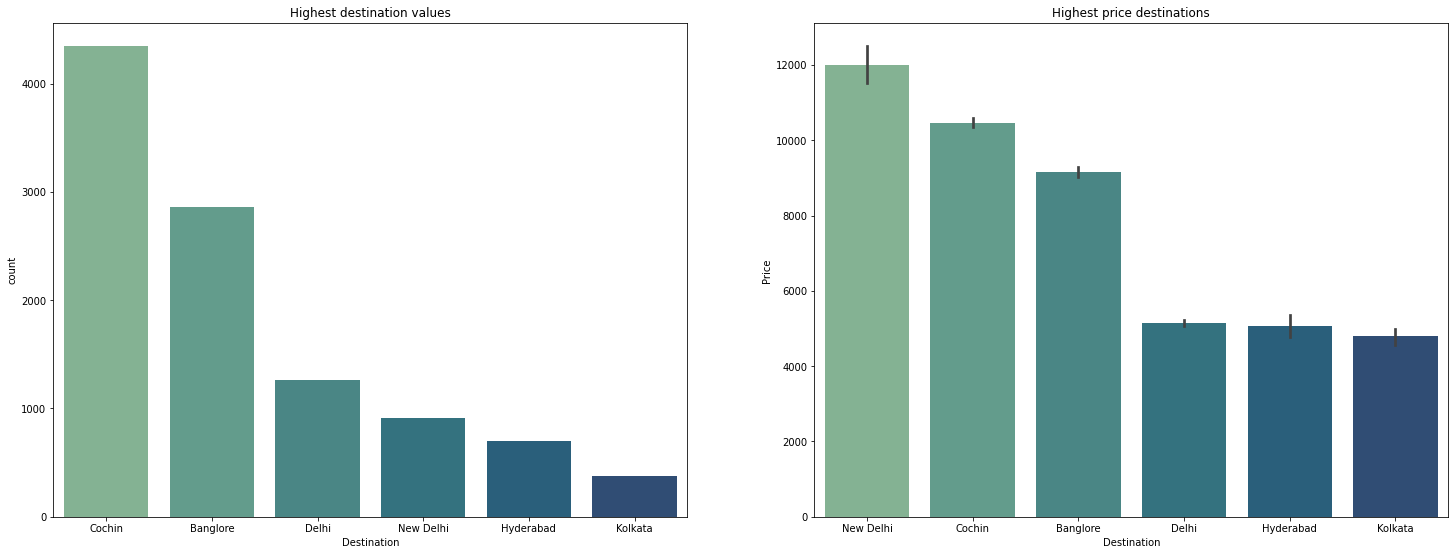

In [25]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
s = sns.countplot(data=df, x='Destination', order=df['Destination'].value_counts().index ,palette='crest')
s.set_title('Highest destination values')

plt.subplot(2,2,2)
order = df.groupby(['Destination'])['Price'].mean().sort_values(ascending = False).index
m = sns.barplot(data=df, x='Destination', y = 'Price', order = order, palette = 'crest')
m.set_title('Highest price destinations')


Text(0.5, 1.0, 'COm')

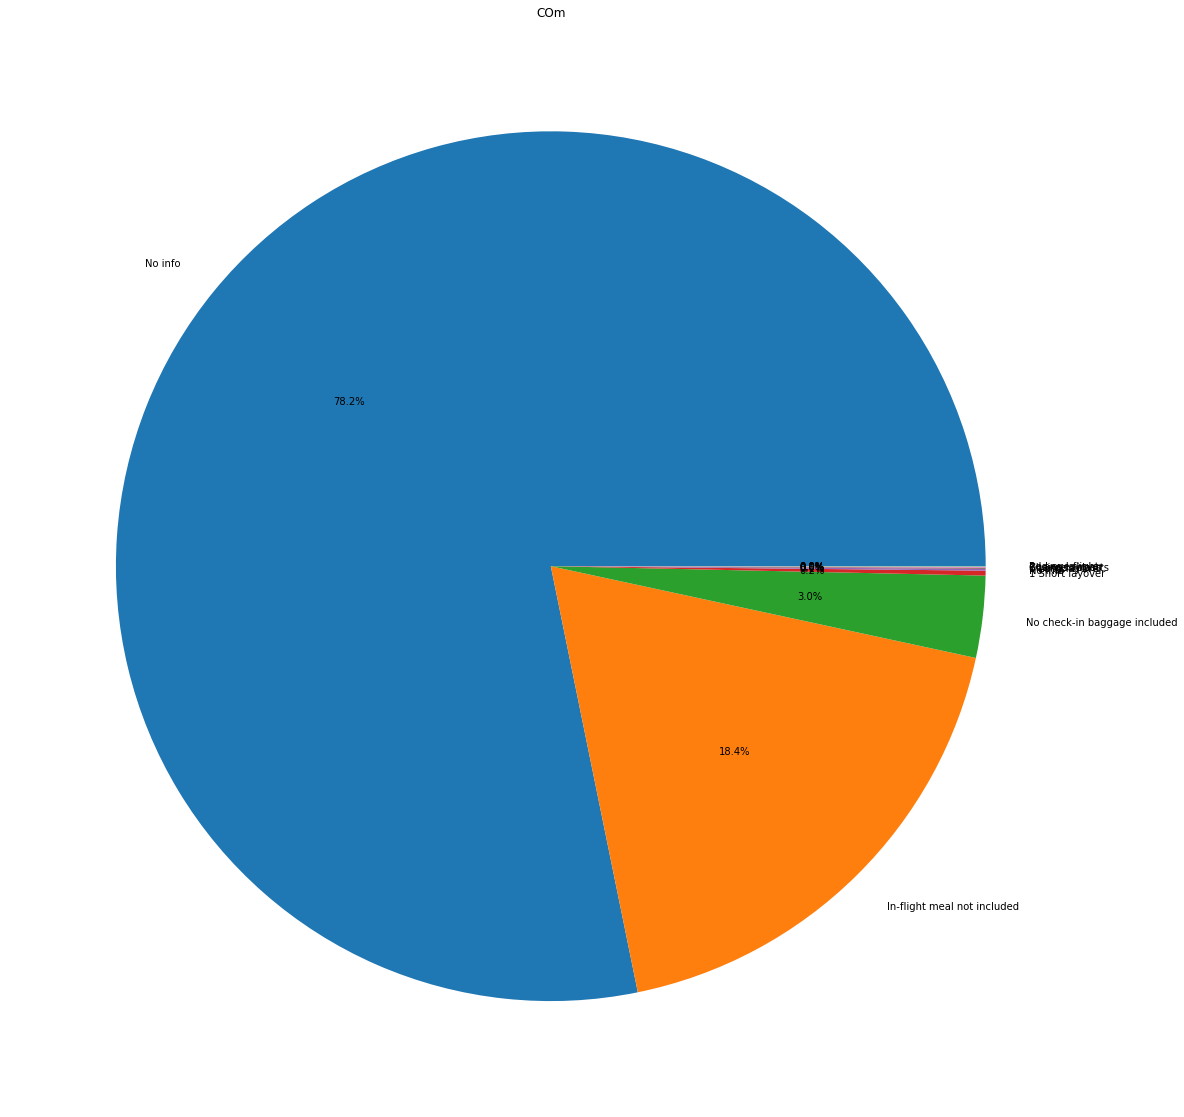

In [26]:


count = df['Additional_Info'].value_counts()
count
#Turn additional info to int to plot it in pie
plt.figure(figsize=(20,20))
ax = plt.pie(count, labels=df['Additional_Info'].unique(), autopct='%1.1f%%')
plt.title('COm')
#This shows the percentage of different additional info, Most of it is no ino so it would be better to remove it before making out model

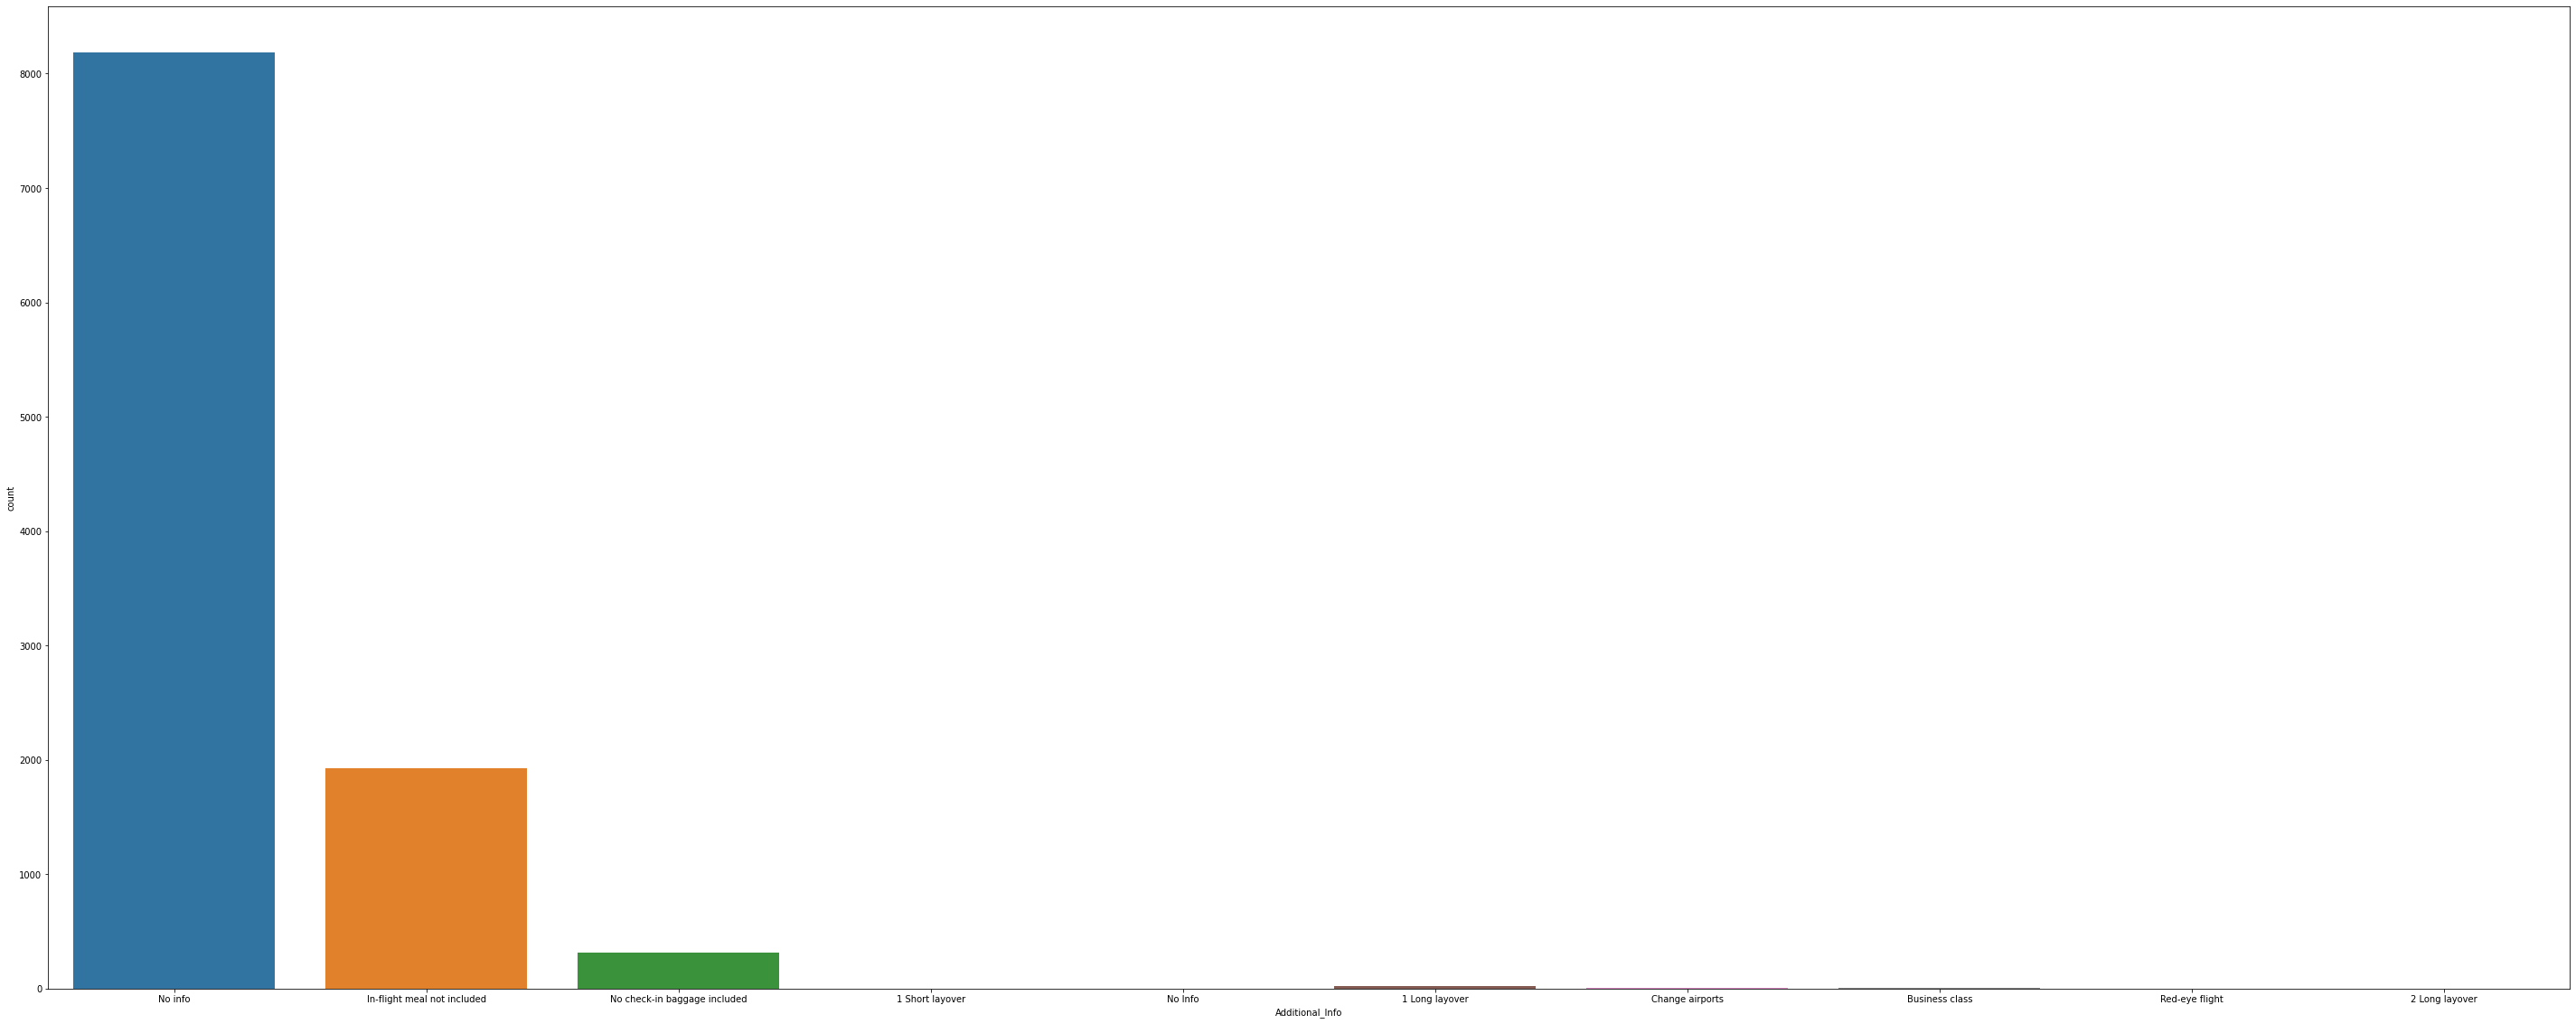

In [27]:

plt.figure(figsize=(50,20))
ax2 = sns.countplot(data=df, x='Additional_Info')
#This shows the percentage of different additional info, Most of it is no ino so it would be better to remove it before making out model


In [28]:
df['Route'].nunique() #128 unique routes

128

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparisson of stops using barplot')

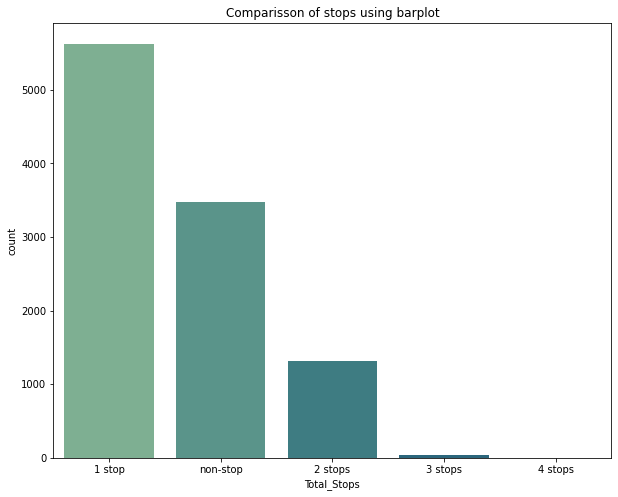

In [29]:
# Lets see total stops using countplot
plt.figure(figsize=(10,8))
sns.countplot(df['Total_Stops'], order=df['Total_Stops'].value_counts().index, palette='crest') 
#Most of the flights had one stop
plt.title('Comparisson of stops using barplot') 

#From this plot we can see that most flights had one stop

Text(0.5, 1.0, 'Comparisson of stops using piechart')

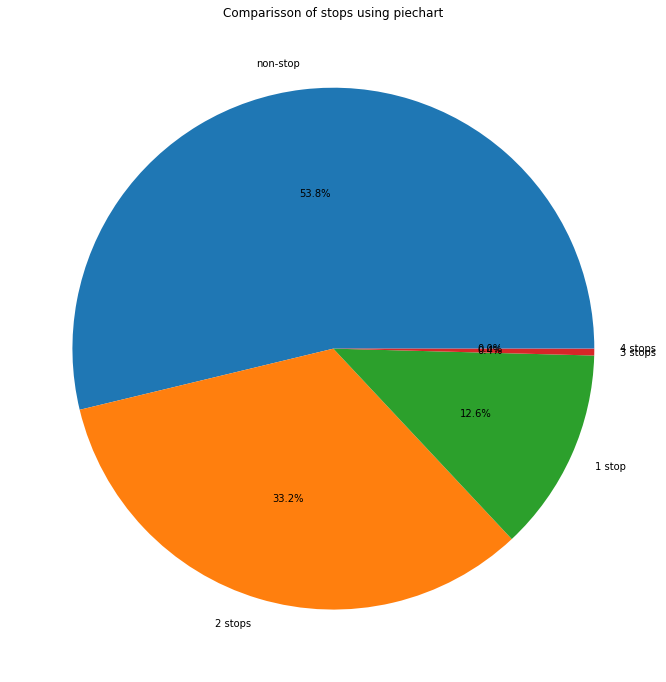

In [30]:
#Lets check pie plot to know the exact percentage
plt.figure(figsize=(20,12))
tot = df['Total_Stops'].value_counts()
p = plt.pie(tot, labels=df['Total_Stops'].unique(), autopct='%1.1f%%')
plt.title('Comparisson of stops using piechart')

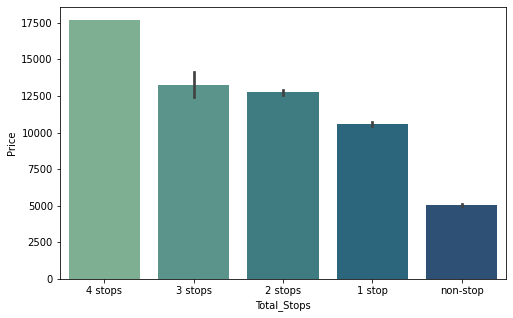

In [31]:
plt.figure(figsize=(8,5))
order = df.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Total_Stops', y='Price', order=order, palette='crest')

#4 stop has highest price

(-0.5, 10.5)

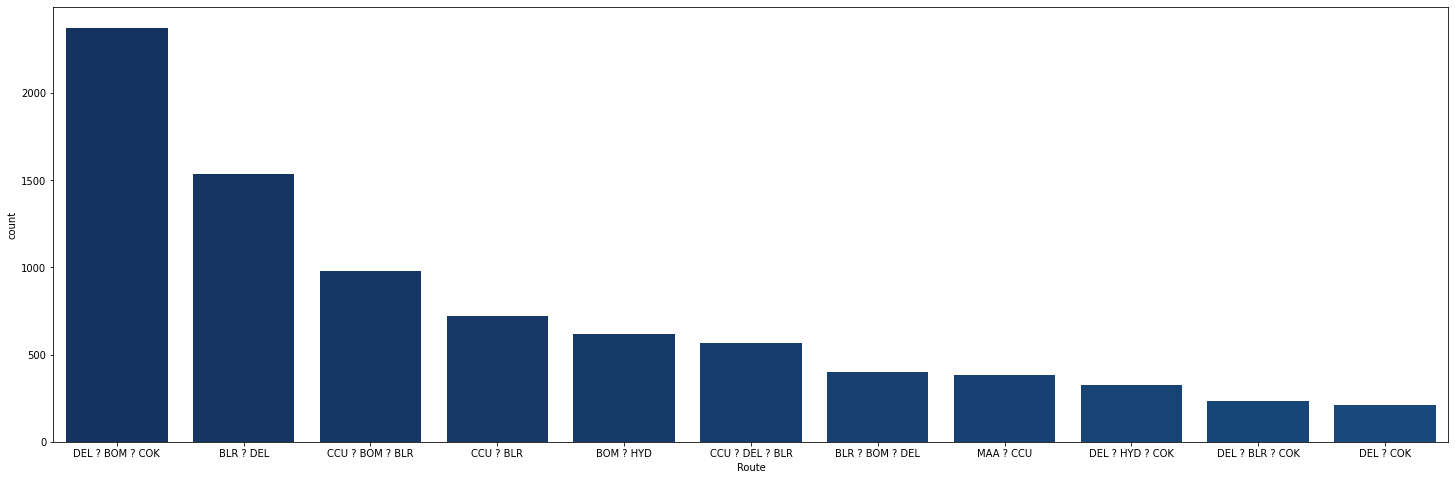

In [32]:
#Lets find top 10 routes

plt.figure(figsize=(25,8))
am =sns.countplot(data=df, x='Route', order=df['Route'].value_counts().index, palette='Blues_r')
am.set_xlim(-0.5,10.5)

#From here we see that the highest no. is DEL? BOM? COK?

(-0.5, 10.5)

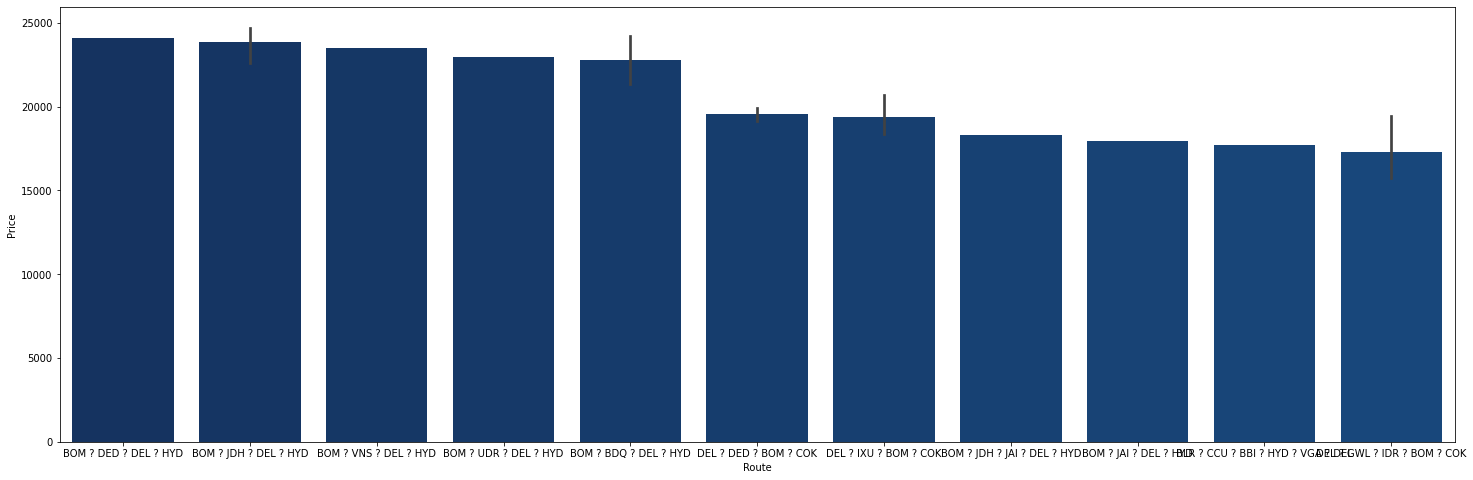

In [33]:

plt.figure(figsize=(25,8))
order = df.groupby(['Route'])['Price'].mean().sort_values(ascending=False).index
am =sns.barplot(data=df, x='Route',y='Price', order=order, palette='Blues_r')
am.set_xlim(-0.5,10.5)

#The BOM? DED? DEL? HYD? Route has highest price rate

In [34]:
df['year'] = pd.to_datetime(df['Date_of_Journey']).dt.year
df['year'].nunique() # All data is in 2019

1

In [35]:
df['month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['month'].nunique() # 7 months
mon = df['month']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Months that has most flights')

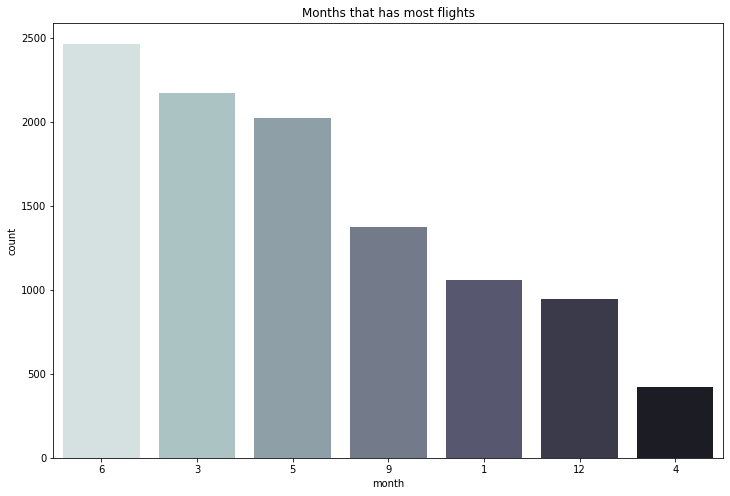

In [36]:
 # LETS SEE WHICH MONTH HAS MOST FLIGHTS

plt.figure(figsize=(12,8))
month = sns.countplot(df['month'], order=df['month'].value_counts().index, palette='bone_r')
month.set_title("Months that has most flights")

#June has the most flights
#April doesn't have much flights, maybe they can start putting offers on april so can people reserve more flights on april, And on June the prices go back to original prices.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


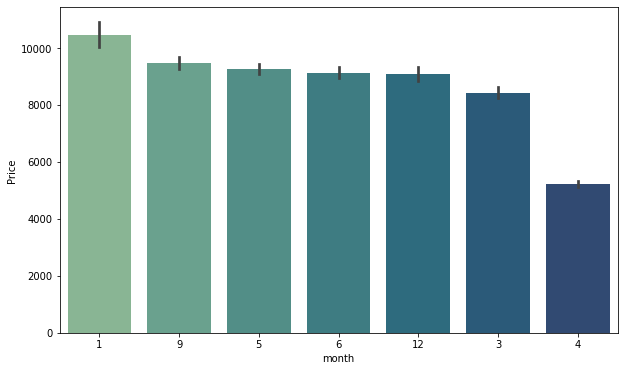

In [37]:
#Compare months to prices
plt.figure(figsize=(10,6))
order = df.groupby(['month'])['Price'].mean().sort_values(ascending = False).index
f = sns.barplot(df['month'],df['Price'], order=order, palette='crest')

#May has highest prices

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Months that has most flights')

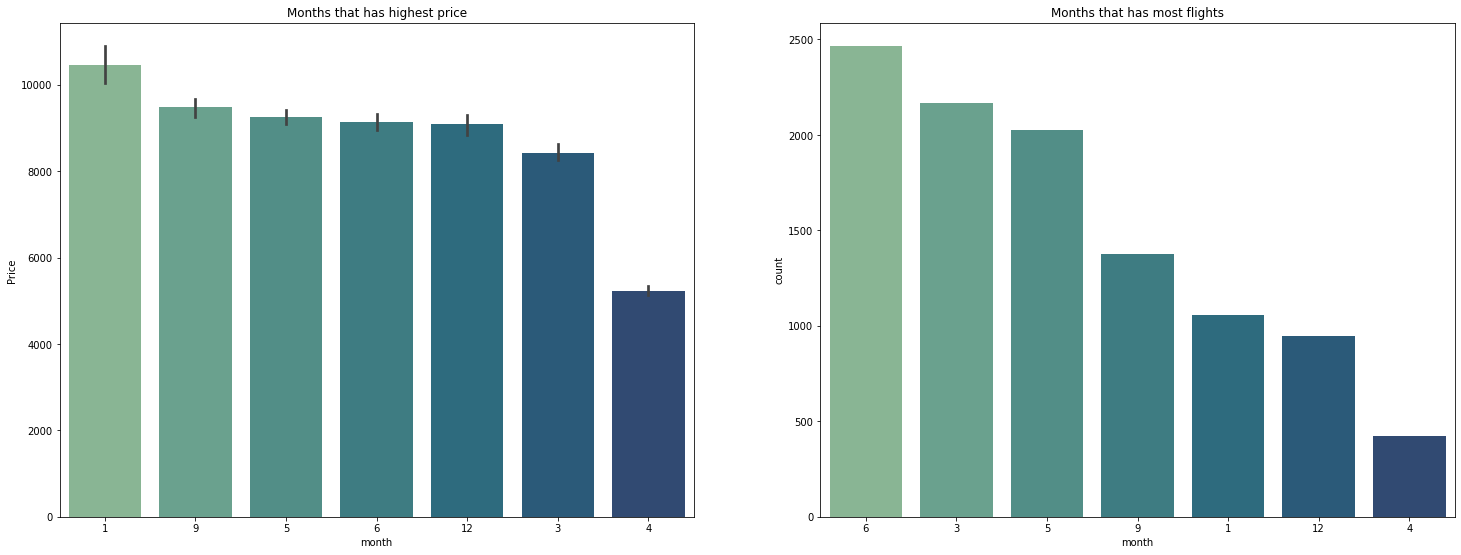

In [38]:

plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
order = df.groupby(['month'])['Price'].mean().sort_values(ascending = False).index
f = sns.barplot(df['month'],df['Price'], order=order, palette='crest')
f.set_title("Months that has highest price")

plt.subplot(2,2,2)

month = sns.countplot(df['month'], order=df['month'].value_counts().index, palette='crest')
month.set_title("Months that has most flights")


In [39]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data = df.apply(le.fit_transform) #Transform all strings to numbers



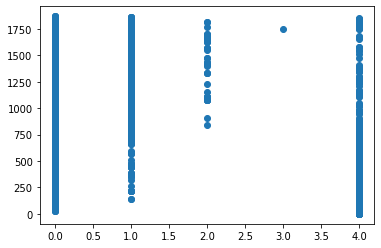

In [40]:
plt.scatter(data['Total_Stops'],data['Price'])

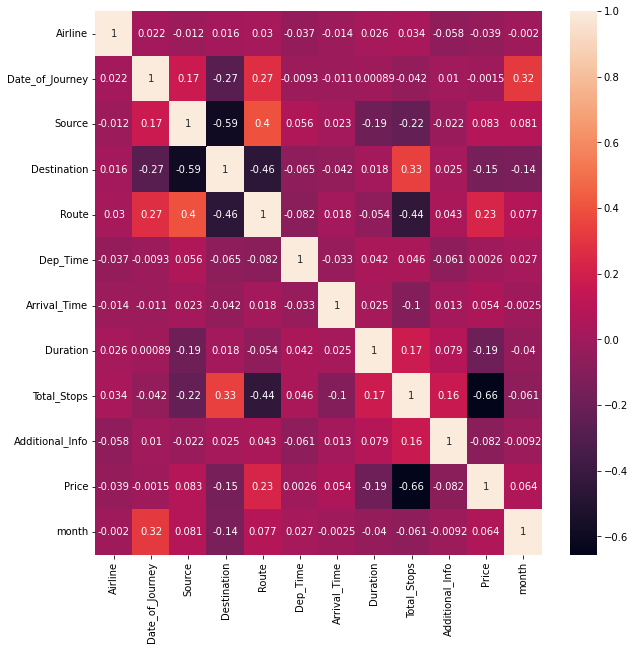

In [41]:
#all flights are on 2019 so we will drop year feature 
data = data.drop('year',axis=1)


fig = plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

#Conclusion
The data set represents indian airlines and prices

-Jetair ways has highest number of flights 

-Jet airways has highest price although highest number of flights, We can deduce that it has highest service and probably the most popular one in india

-July had highest number of flights

-June had highest price in flights

-highest count of route is DEL? BOM? COK?

-The route that had mighest prices is BOM? DED? DEL? HYD?

-53.8 percent of flights was non stop

-Delhi was the highest price source

-The highest price destination was cochin


-Highest prices were on flights that had one stop

-Now imagine someone picking June , the most expensive route ,The most expensive source(Delhi), the most expensive destination(New Delhi) and reserving a onestop ticket, How much would he pay? probably alot, that is why we are going to predict the prices now :)

#Linear Model

In [42]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,3,24,0,5,18,211,233,240,4,8,65,1
1,1,6,3,0,84,31,906,336,1,8,669,0
2,4,43,2,1,118,70,413,106,1,8,1537,5
3,3,10,3,0,91,164,1324,311,0,8,389,6
4,3,0,0,5,29,149,1237,303,0,8,1457,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,81,5
10679,1,29,3,0,64,193,1305,237,4,8,84,2
10680,4,29,0,2,18,58,824,280,4,8,604,2
10681,10,0,0,5,18,92,938,238,4,8,1377,0


In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split


x=data.drop('Price',axis=1).values
y=data['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 32)

In [44]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)

#Model is done

In [45]:
#Check mean squared error
print('MSE :', mean_squared_error(y_test,y_pred))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_pred)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_pred)*100) #0.42 percent

MSE : 183213.04370684165
square root of MSE : 428.03392821929623
______________________________________________________________________
Accuracy : 42.24675227706358


In [46]:
#Same steps but with kFolds and grid search
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, random_state= 2485, shuffle=True)

scores = cross_val_score(lin_model, x,y, scoring='neg_mean_squared_error', cv=cv)

print('mean_squared_error', np.mean(np.absolute(scores)))


mean_squared_error 179371.3120177327


#Conclusion

By using linear model, we got a very large MSE and very low accuracy(r_2 score) of 42 percent

#Polynomial model

In [47]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.33, random_state = 1)
LR_model_2 = linear_model.LinearRegression()
LR_model_2.fit(x_train,y_train)

y_pred_2 = LR_model_2.predict(x_test)

print('MSE :', mean_squared_error(y_test,y_pred_2))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_pred_2)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_pred_2)*100)



MSE : 85272.93270520293
square root of MSE : 292.01529532749294
______________________________________________________________________
Accuracy : 73.86842056768548


In [48]:
#pip install mlxtend --upgrade

In [49]:

from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(LR_model_2, x_train, y_train, x_test, y_test, loss='mse', random_seed=32)

print('avg loss :', avg_expected_loss)
print('avg bias :', avg_bias)
print('avg var :', avg_var)

avg loss : 133616.46851483252
avg bias : 90127.79369972226
avg var : 43488.674815110295


In [50]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=32)
scores = cross_val_score(LR_model_2, x_poly,y, scoring='neg_mean_squared_error', cv=cv)

print('mean_squared_error', np.mean(np.absolute(scores)))


mean_squared_error 92984.88110488307


#Conclusion

The score is slightly better but still not quite good accuracy or mean squared error

#Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.33, random_state=1)
tree_model.fit(x_train, y_train)

y_pred_t = tree_model.predict(x_test)

print('MSE :', mean_squared_error(y_test,y_pred_t))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_pred_t)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_pred_t)*100) 


MSE : 66708.829957204
square root of MSE : 258.28052570258563
______________________________________________________________________
Accuracy : 79.59634656707684


In [52]:
#pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree_model, x_train, y_train, x_test, y_test, loss='mse', random_seed=32)

print('avg loss :', avg_expected_loss)
print('avg bias :', avg_bias)
print('avg var :', avg_var)

avg loss : 81987.44822703832
avg bias : 40740.8400338028
avg var : 41246.608193235516


In [53]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits = 5, shuffle = True, random_state=32)
cross_val_score(tree_model, x, y, cv=cv, scoring ='neg_mean_squared_error')

print('mean_squared_error', np.mean(np.absolute(scores)))

mean_squared_error 92984.88110488307


In [54]:
columns_name = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info','month']

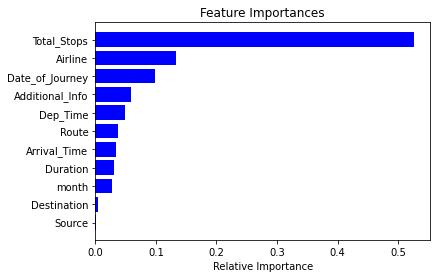

In [55]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[columns_name[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

#Conclusion

as you can see, there is a huge improvement in our MSE and accuracy after using tree regression, because we increases complexity of our model

#Random forest regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(random_state=0, max_depth=100, min_samples_split = 10, n_estimators=20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.333, random_state=32)
rand_forest.fit(x_train, y_train)

y_pred_r = rand_forest.predict(x_test)

print('MSE :', mean_squared_error(y_test,y_pred_r))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_pred_r)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_pred_r)*100) 

MSE : 34834.8776975505
square root of MSE : 186.64103969264235
______________________________________________________________________
Accuracy : 89.02370127490076


In [57]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rand_forest, x_train, y_train, x_test, y_test, loss='mse', random_seed=32)

print('avg loss :', avg_expected_loss)
print('avg bias :', avg_bias)
print('avg var :', avg_var)

avg loss : 40861.50394853125
avg bias : 34674.01715401089
avg var : 6187.486794520352


In [58]:
from sklearn.model_selection import GridSearchCV


parm_grid = { 'n_estimators' : [5,6,8,7,22,10,80,100],
              'max_depth' : [5,10,3,100,200,19],
             'min_samples_split': [1,2,3,4,5]
}

RFR = RandomForestRegressor(random_state=0)

g_search = GridSearchCV(estimator = RFR, param_grid=parm_grid, cv=5)


g_search.fit(x_train,y_train)

print(g_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

{'max_depth': 100, 'min_samples_split': 4, 'n_estimators': 100}


In [59]:
rand_forest2 = RandomForestRegressor(random_state=0, max_depth=100, min_samples_split = 4, n_estimators=100)
rand_forest2.fit(x_train, y_train)
y_predf = rand_forest.predict(x_test)

print('MSE :', mean_squared_error(y_test,y_predf))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_predf)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_predf)*100) 

MSE : 43597.20063164281
square root of MSE : 208.79942679912415
______________________________________________________________________
Accuracy : 86.26273639121614


In [60]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rand_forest, x_train, y_train, x_test, y_test, loss='mse', random_seed=32)

print('avg loss :', avg_expected_loss)
print('avg bias :', avg_bias)
print('avg var :', avg_var)

avg loss : 40861.50394853125
avg bias : 34674.01715401089
avg var : 6187.486794520352


In [61]:
df.columns
columns_name = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info','month']

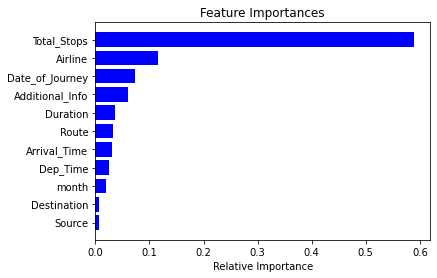

In [66]:
importances = rand_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[columns_name[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

#Conclusion 

As we used more complex models, the accuarcy increases and mean squared error increases, but we have to make sure that there is no under or over fitting happening in our model, Best accuracy is 89 percent

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.333, random_state=32)

model_g = GradientBoostingRegressor(max_depth=100, n_estimators=5)
model_g.fit(x_train, y_train)

y_predg = model_g.predict(x_test)

print('MSE :', mean_squared_error(y_test,y_predg))
print('square root of MSE :', np.sqrt(mean_squared_error(y_test,y_predg)))

print('______________________________________________________________________')

print('Accuracy :', r2_score(y_test,y_predg)*100) 

MSE : 132156.58415385935
square root of MSE : 363.5334704726091
______________________________________________________________________
Accuracy : 58.35810997368653


In [64]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model_g, x_train, y_train, x_test, y_test, loss='mse', random_seed=32)

print('avg loss :', avg_expected_loss)
print('avg bias :', avg_bias)
print('avg var :', avg_var)

avg loss : 137269.58139802274
avg bias : 132580.6566439341
avg var : 4688.924754088633
